# IIC-3641 GML UC

In [1]:
import networkx as nx

fh = open("CA-AstroPh.txt", "rb")
G = nx.read_edgelist(fh)
fh.close()

print(G)

Graph with 18772 nodes and 198110 edges



## Actividad en clase

Haga lo siguiente:

- Calcule la distibución de grado de G. Luego, modifique el eje y de manera que corresponda a la probabilidad del grado (pk) en lugar de la frecuencia.
- Genere una random network G(N,p), talque N sea igual al número de nodos de la red real. Ajuste p de manera que el grado promedio de la red aleatoria coincida con el de la red real. 
- Plotee la distribución de grado de ambas curvas (pk/k) en ejes log-log. ¿Qué puede concluir?
- Calcule el coeficiente promedio de clustering de cada red. ¿Qué puede concluir?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.

***Tiene hasta el final de la clase.***

# Distribución de grado de la red

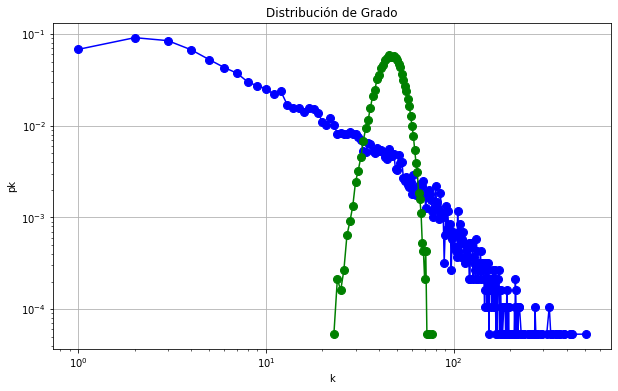

In [2]:
import matplotlib.pyplot as plt

degrees = [G.degree(n) for n in G.nodes()]

degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x, y = zip(*sorted_degrees)
p = [n / 18772 for n in y]

er = nx.erdos_renyi_graph(18772, 0.0025)

degrees = [er.degree(n) for n in er.nodes()]
degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x_er, y_er = zip(*sorted_degrees)
p_er = [n / 18772 for n in y_er]

plt.figure(figsize=(10, 6))
plt.plot(x, p, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Grado')
plt.xlabel('k')
plt.ylabel('pk')

plt.plot(x_er, p_er, 'go-', markersize=8)

plt.grid(True)
plt.show()

# Coeficiente de clustering promedio de la red

In [3]:
cl_coefs = nx.clustering(G)
sum(cl_coefs.values())/18772

0.6305932411707943

In [4]:
cl_coefs = nx.clustering(er)
sum(cl_coefs.values())/18772

0.002476497173205935